2023/11/19

# k-means法
$K$ 個のクラスタに分類する教師なし学習

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)
print(X.shape, y.shape)

(150, 4) (150,)


In [3]:
k = 3   # クラスタ数

centroids = X[np.random.permutation(len(X))[:k]]    # (k, 4) 重心（標本点で初期化）
for epoch in range(1000):
    cluster = ((X[:, None] - centroids) ** 2).sum(-1).argmin(1)     # (150,) 最も近い重心 Expectation-step
    centroids = np.array([X[cluster==c].mean(0) for c in range(k)]) # (k, 4) 重心更新 Maximization-step

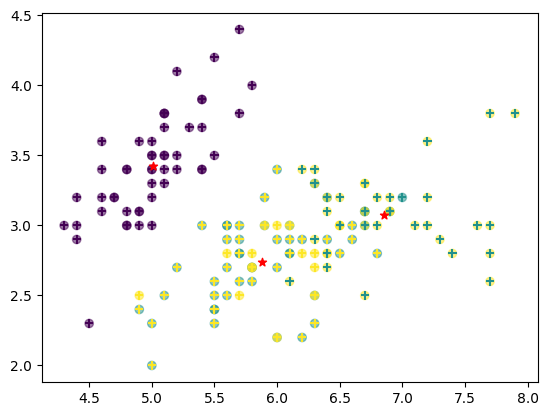

In [6]:
plt.scatter(*X.T[:2], c=y, alpha=0.5)               # 正解ラベル
plt.scatter(*X.T[:2], c=cluster, marker="+")        # クラスタ
plt.scatter(*centroids.T[:2], c="r", marker="*")    # 重心